## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [89]:
#Importing important packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import warnings
warnings.filterwarnings("ignore")

#### Mounting the drive and reading the dataset

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/MyDrive/creditcard.csv')

### Exploratory Data Analysis

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
#Checking the columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Checking the columns numerical statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Checking the number of missing values in the data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the data. Let's now check the class balance.

In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

The data is highly imbalanced as the number of people who do not comming fraud constitute of 99.8% of the data.

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

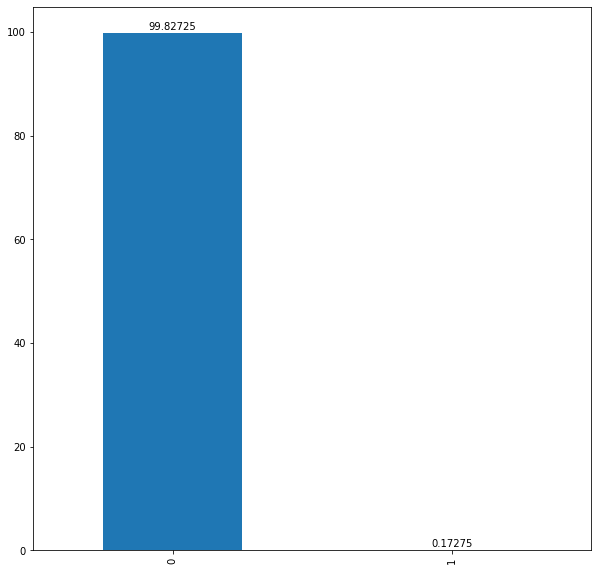

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=[10,10])
plot_bar = (df.Class.value_counts(normalize = True)*100).plot.bar()
for p in plot_bar.patches:
  height = p.get_height()
  plot_bar.text(p.get_x()+p.get_width()/2,height+0.5,'{:1.5f}'.format(height), ha = 'center')
plt.show()

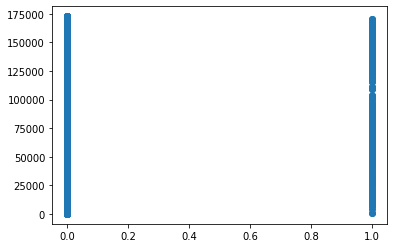

In [14]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(x = df.Class, y = df.Time)
plt.show()

The distribution of class with time looks continuous with no outliers.

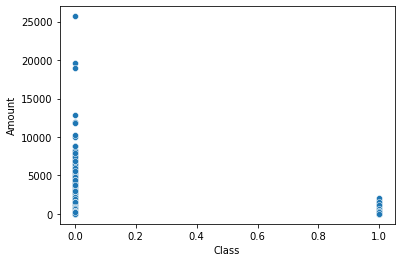

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = df.Class,y = df.Amount)
plt.show()


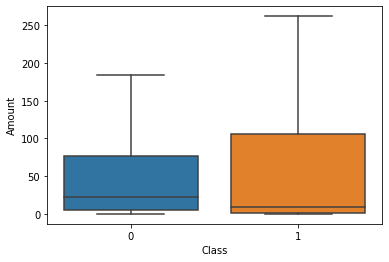

In [17]:
#The distibution can also be checked using the boxplots
sns.boxplot(x=df.Class,y=df.Amount, showfliers=False)
plt.show()

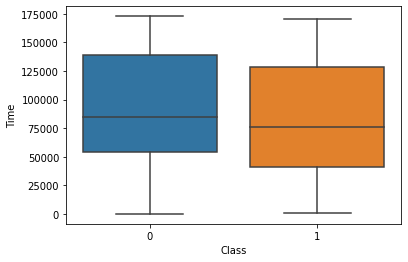

In [18]:
#The distibution can also be checked using the boxplots
sns.boxplot(x=df.Class,y=df.Time, showfliers=False)
plt.show()

We can see that no amount of transactions are more likely to be fradulent. 

#### Lets now check the distribution of all the features that exist in the data.

<Figure size 432x288 with 0 Axes>

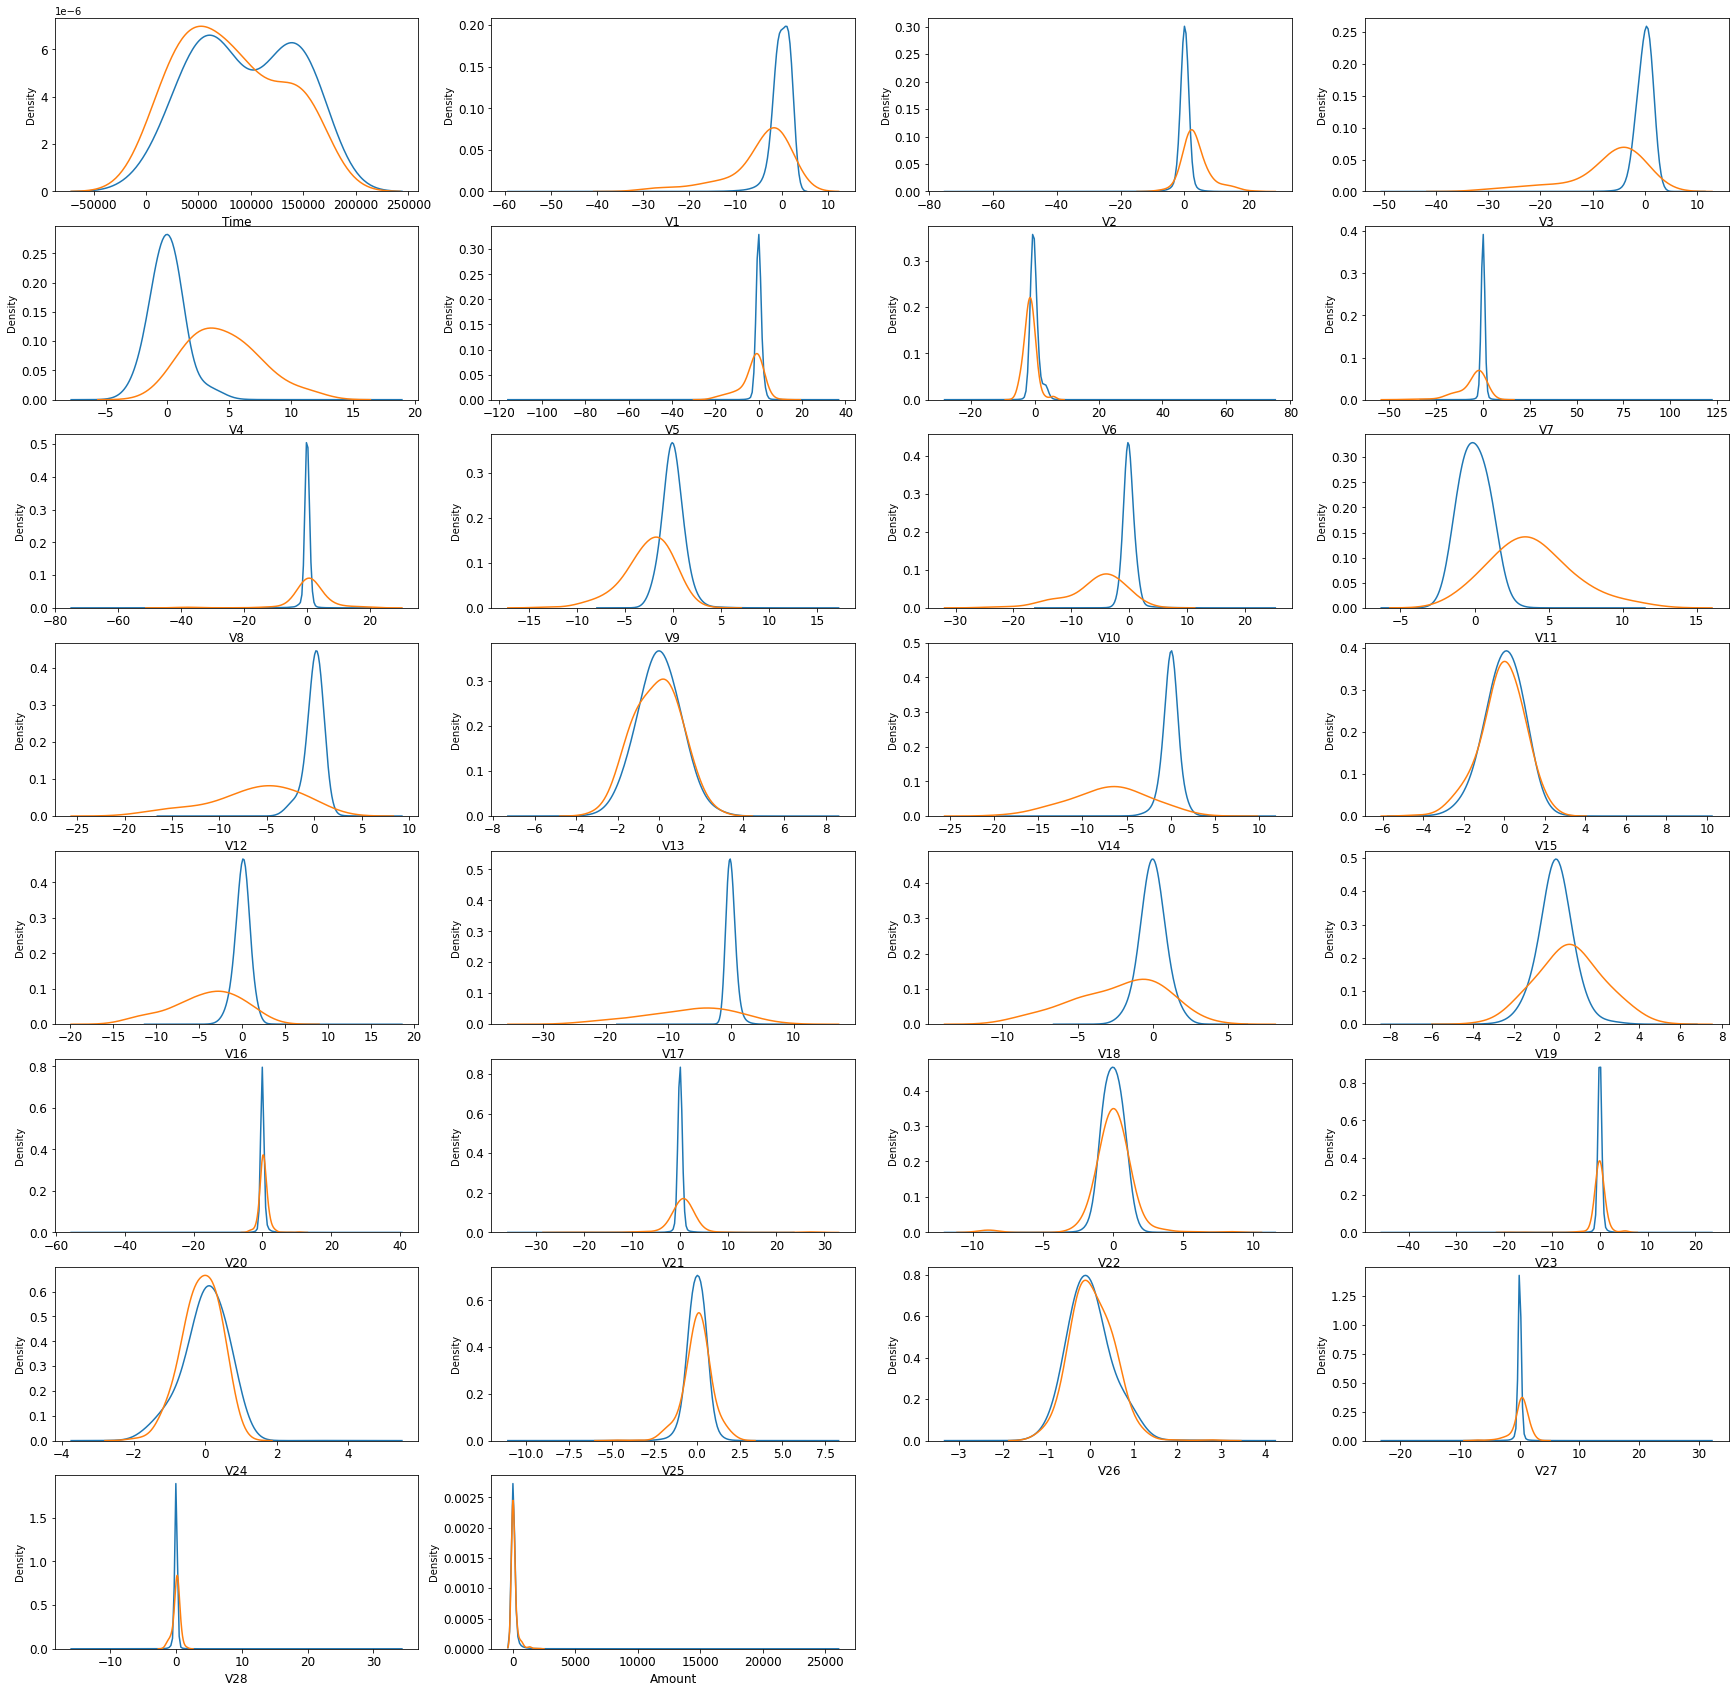

In [19]:
var = list(df.columns.values[:-1])
i = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(6,5,figsize=(30, 30))

for feature in var:
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], label="0")
    sns.kdeplot(t1[feature], label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    i += 1
plt.show()

In [20]:
# Drop unnecessary columns
# As there is no trend respect to time, I am going to drop the time variable from the data
df.drop('Time', inplace = True, axis = 1)

## Splitting the data into train & test data

In [21]:
y = df['Class']
X = df.drop('Class', axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [24]:
#Scaling the amaount vairable as all other variables are PCA components, we do not need to scale them
scaler = StandardScaler()
X_train.loc[:,'Amount'] = scaler.fit_transform(pd.DataFrame(X_train.loc[:,'Amount']))
X_test.loc[:,'Amount'] = scaler.transform(pd.DataFrame(X_test.loc[:,'Amount']))

In [25]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


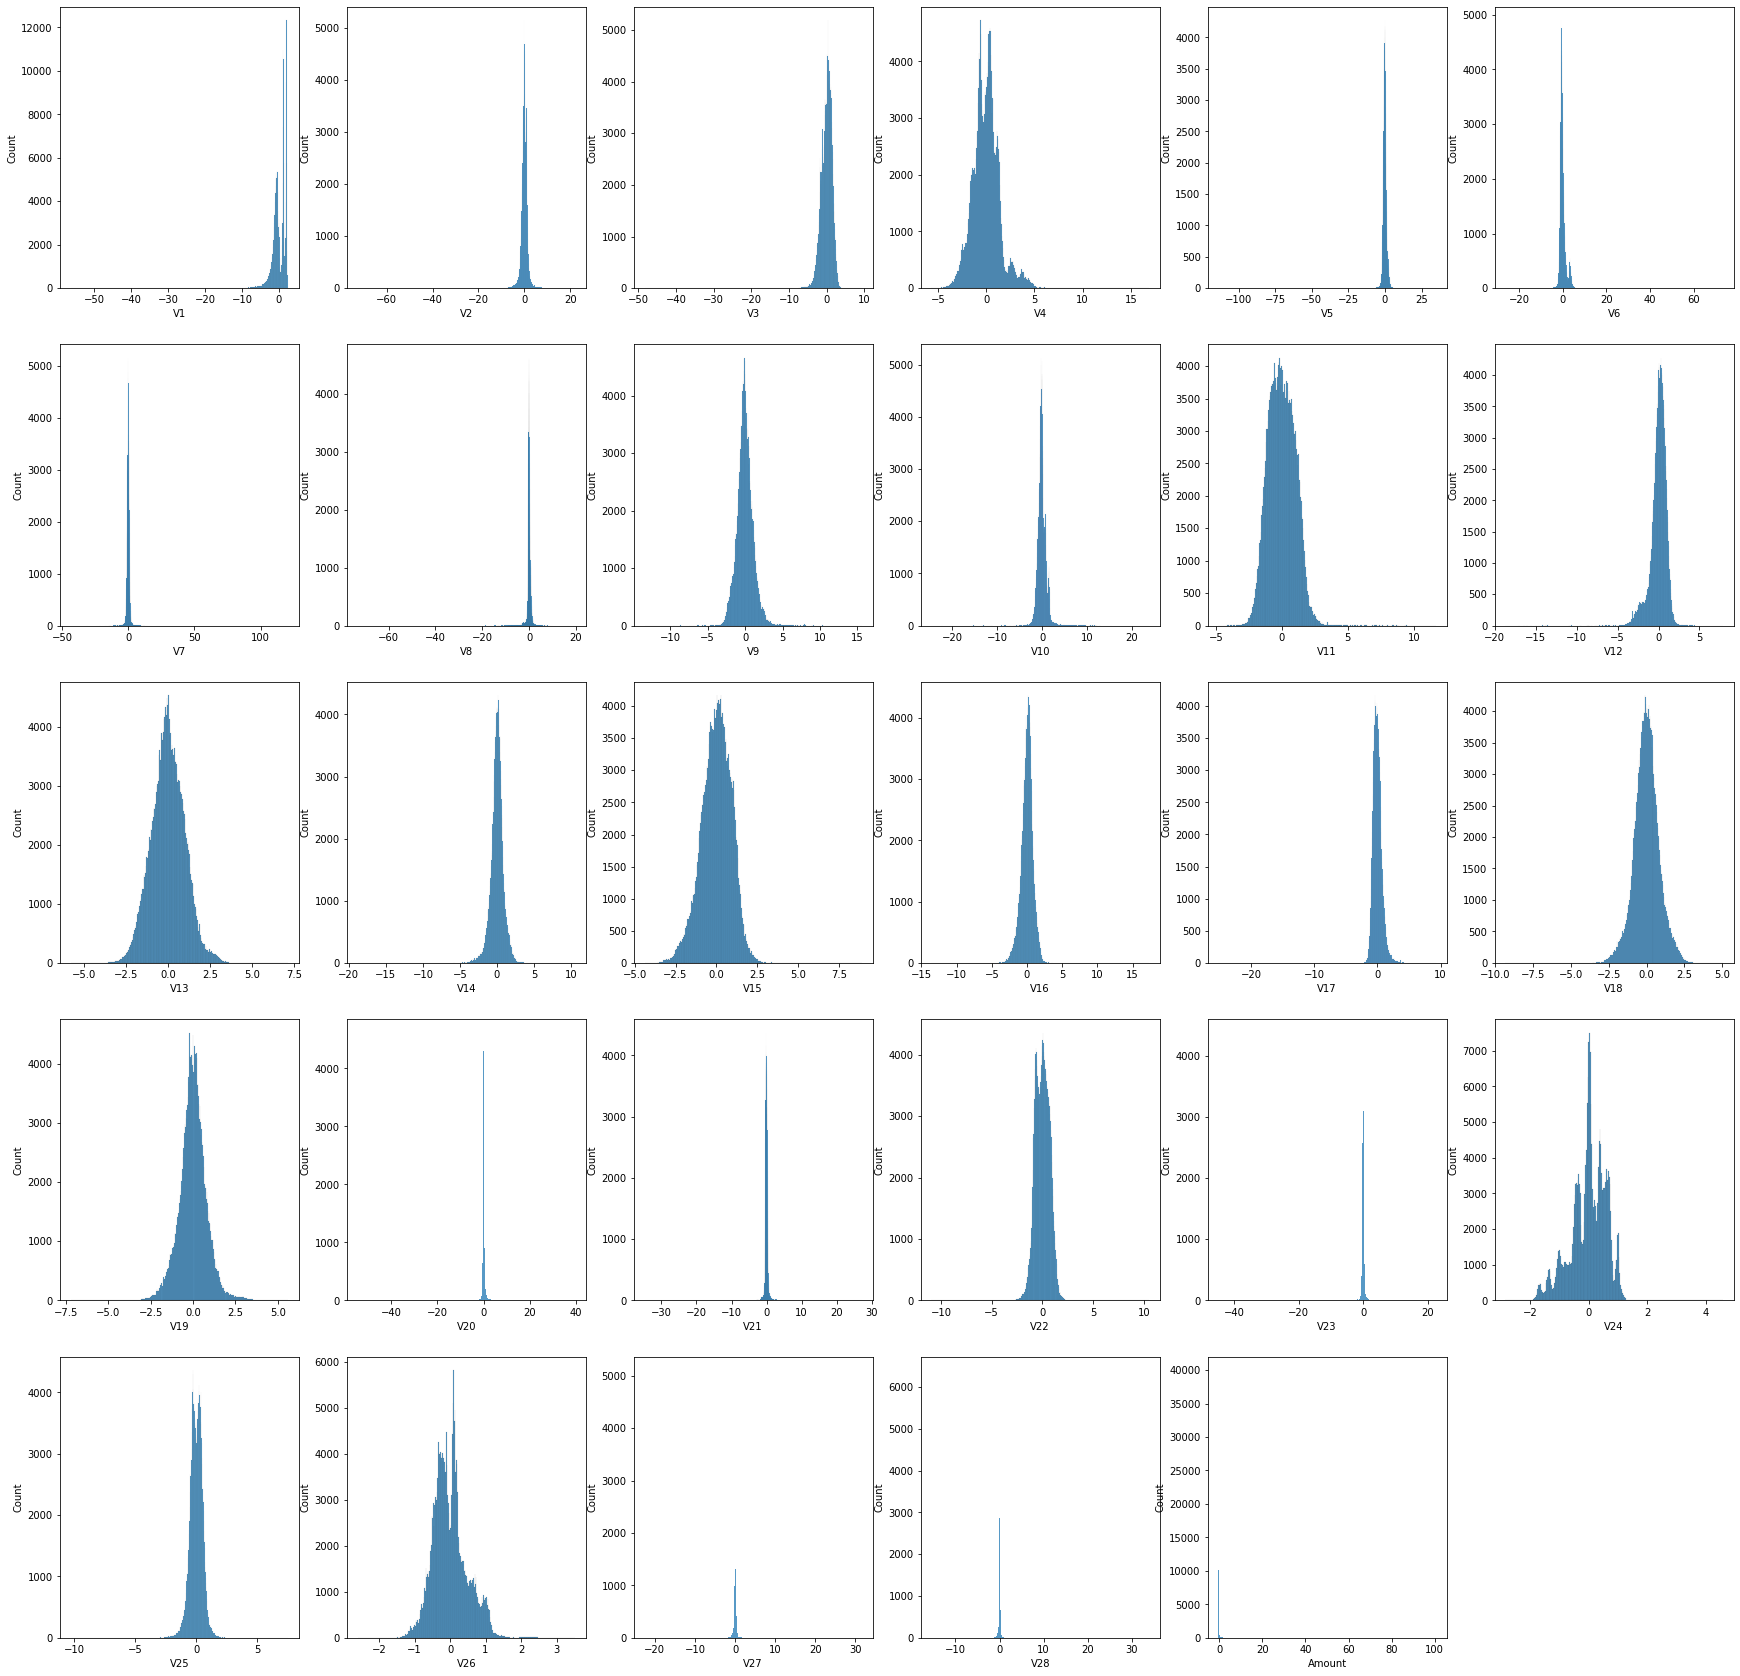

In [26]:
plt.figure(figsize = [30,30])
c = 1
for i in X_train.columns:
  plt.subplot(5,6,c)
  sns.histplot(X_train[i])
  c+=1




In [27]:
# Checking the skewness of the features
skew_list = []
for i in X_train.columns:
    skew_list.append(X_train[i].skew())

skew = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skew.set_index("Features", inplace=True)
slew.T



Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.277668,-4.890421,-2.274281,0.687466,-2.806948,1.944495,3.180573,-8.851621,0.542097,1.112318,0.364167,-2.303473,0.061568,-2.014879,-0.312641,-1.119031,-4.048546,-0.267691,0.111071,-1.810953,3.034115,-0.194068,-5.96524,-0.555467,-0.423168,0.579692,-0.77311,11.134475,18.155243


In [28]:
# Acceptable values of skewness fall in between -3 to 3. We are going to list out the variables which have skewness out of the acceptable range
skewed = tmp.loc[(abs(tmp["Skewness"]) > 3)].index
print(skewed)

Index(['V1', 'V2', 'V7', 'V8', 'V17', 'V21', 'V23', 'V28', 'Amount'], dtype='object', name='Features')


## Mitigate skewness using PowerTransformer

In [29]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train.loc[:,skewed] = pt.fit_transform(X_train.loc[:,skewed])


In [30]:
X_test.loc[:,skewed] = pt.transform(X_test.loc[:,skewed])

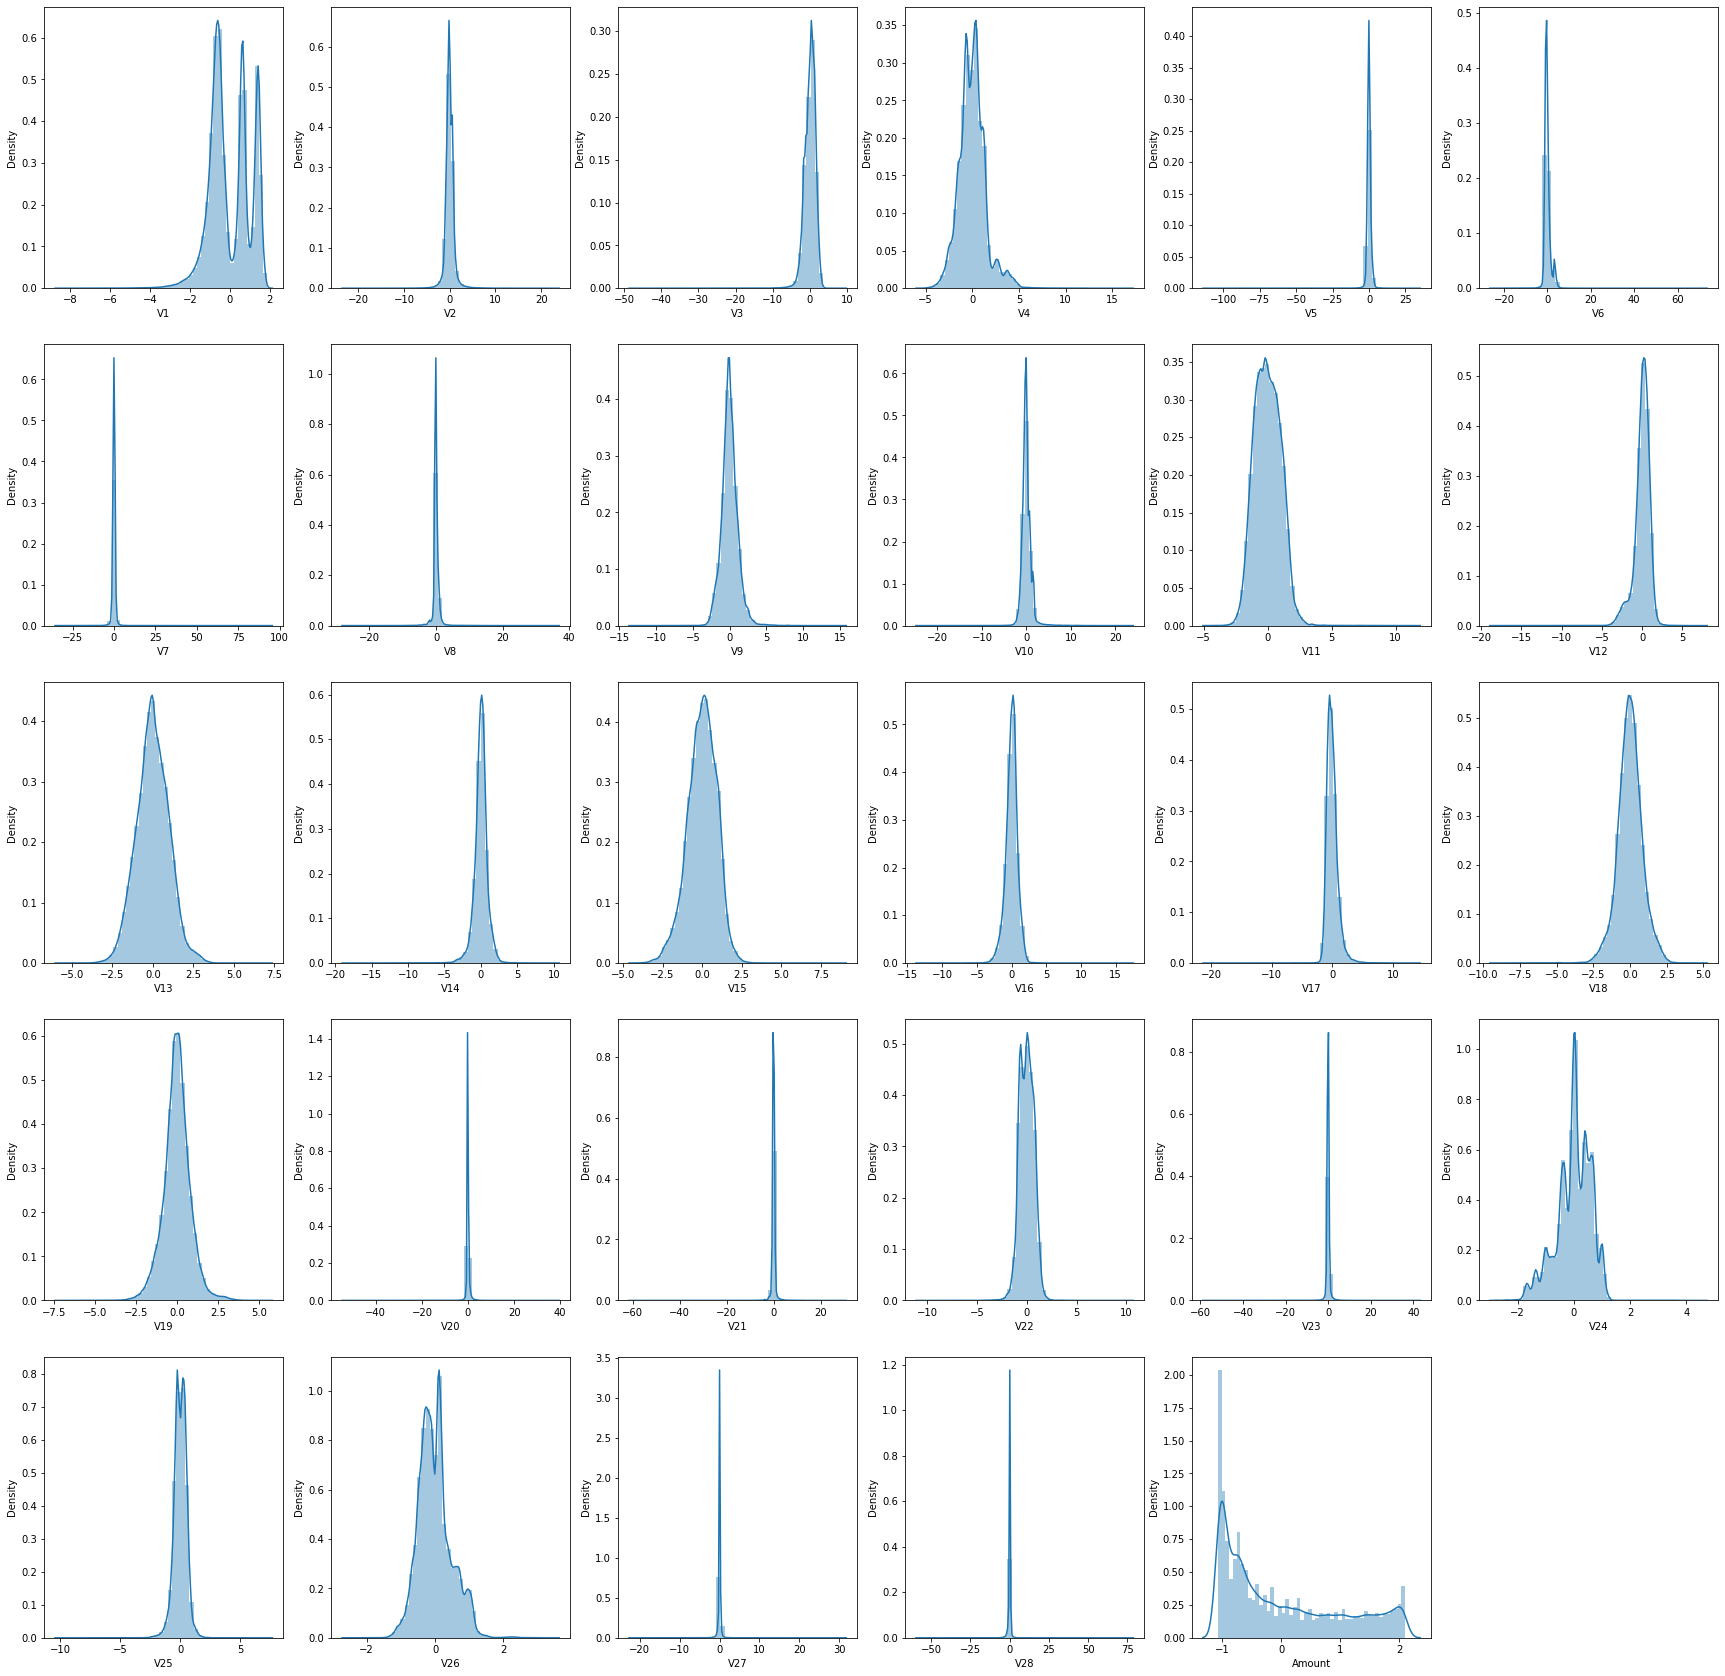

In [31]:
plt.figure(figsize = [30,30])
c = 1
for i in X_train.columns:
  plt.subplot(5,6,c)
  sns.distplot(X_train[i])
  c+=1


In [32]:
# Checking the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T
skewed = tmp.loc[(abs(tmp["Skewness"]) > 3)].index
print(skewed)


Index([], dtype='object', name='Features')


We have rectified the skewness of the features. Lets go ahead with model building now.

## Model Building 

As we have seen that the data is highly imbalanced as 99.83% of the transactions are non-fraudulent and just 0.17% of the transactions all fraudulent. Hence a very dumb model can also achieve high level of accuracy. Thus we will use ROC-AUC score, sensiticity-specificity, recall-precision to test how our model is performing.

### Imbalanced Data

#### Logistic Regression


In [33]:
num_C = {"C": [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 


In [34]:
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.8min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [35]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.867873,0.033184,0.016766,0.002096,0.0001,{'C': 0.0001},0.995863,0.970712,0.997550,0.986822,0.986853,0.976718,0.996232,0.977259,0.969096,0.984552,0.984166,0.009936,1,0.982627,0.985192,0.982511,0.983496,0.983286,0.984428,0.981979,0.984775,0.985818,0.983807,0.983792,0.001186
1,1.719851,0.111878,0.015923,0.001420,0.01,{'C': 0.01},0.994042,0.981742,0.989460,0.977699,0.989691,0.972505,0.994938,0.976107,0.968589,0.987340,0.983212,0.008743,2,0.983297,0.985806,0.983434,0.985013,0.983775,0.984924,0.983213,0.985767,0.987474,0.983515,0.984622,0.001348
2,2.715745,0.152666,0.015704,0.000808,0.1,{'C': 0.1},0.992602,0.982977,0.977260,0.968621,0.985410,0.940259,0.992167,0.953610,0.961386,0.985102,0.973939,0.016622,3,0.976658,0.981144,0.977339,0.979400,0.978577,0.978723,0.977343,0.981262,0.984103,0.975760,0.979031,0.002401
3,3.269625,0.239359,0.015531,0.000250,1,{'C': 1},0.991278,0.982482,0.975550,0.966620,0.983891,0.929281,0.990593,0.942635,0.958602,0.982850,0.970378,0.019921,4,0.974245,0.979399,0.974881,0.976919,0.976347,0.976445,0.974840,0.979139,0.982565,0.972739,0.976752,0.002763
4,3.258394,0.147694,0.015399,0.000198,10,{'C': 10},0.991047,0.982391,0.975422,0.966388,0.983661,0.928113,0.990332,0.941123,0.958229,0.982446,0.969915,0.020300,5,0.973940,0.979159,0.974540,0.976591,0.976043,0.976153,0.974512,0.978822,0.982352,0.972364,0.976448,0.002801
5,3.314888,0.195359,0.015877,0.000917,100,{'C': 100},0.991015,0.982376,0.975411,0.966360,0.983632,0.927977,0.990314,0.940921,0.958178,0.982402,0.969859,0.020349,6,0.973909,0.979136,0.974503,0.976561,0.976013,0.976118,0.974477,0.978779,0.982330,0.972326,0.976415,0.002805
6,3.305948,0.238428,0.016806,0.004043,1000,{'C': 1000},0.991012,0.982372,0.975410,0.966355,0.983632,0.927976,0.990311,0.940912,0.958174,0.982398,0.969855,0.020349,7,0.973905,0.979134,0.974502,0.976552,0.976010,0.976117,0.974472,0.978776,0.982327,0.972321,0.976412,0.002805
7,3.369282,0.226334,0.015841,0.001523,10000,{'C': 10000},0.991013,0.982373,0.975408,0.966356,0.983628,0.927971,0.990311,0.940907,0.958170,0.982398,0.969854,0.020351,8,0.973904,0.979134,0.974503,0.976554,0.976011,0.976116,0.974474,0.978775,0.982327,0.972320,0.976412,0.002805


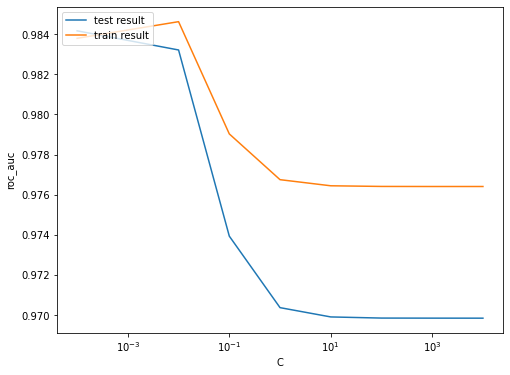

In [36]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [37]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9841656501243573 at C = 0.0001


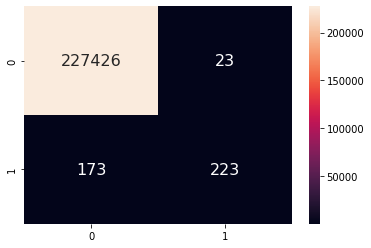

In [51]:
## Logistic regression with optimal c
logistic = LogisticRegression(C=0.001)
model_1 = logistic.fit(X_train, y_train)
y_train_pred = model_1.predict(X_train)

confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()


In [52]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train, y_train_pred))

Accuracy:- 0.9991397660690382
Sensitivity:- 0.5631313131313131
Specificity:- 0.9998988784298898


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      0.56      0.69       396

    accuracy                           1.00    227845
   macro avg       0.95      0.78      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [53]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

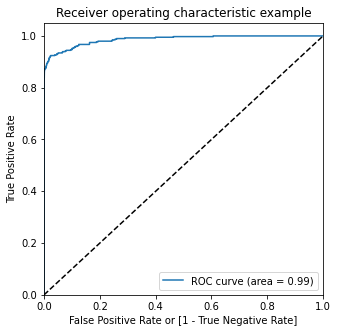

In [54]:
y_train_pred_prob = model_1.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_prob)

In [55]:
y_test_pred = model_1.predict(X_test)

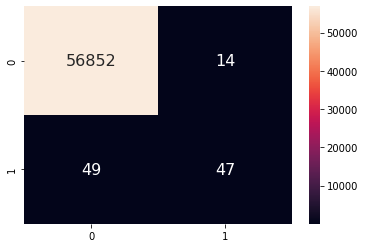

In [56]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [57]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9991397660690382
Sensitivity:- 0.4895833333333333
Specificity:- 0.9997538071958639


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.49      0.60        96

    accuracy                           1.00     56962
   macro avg       0.88      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



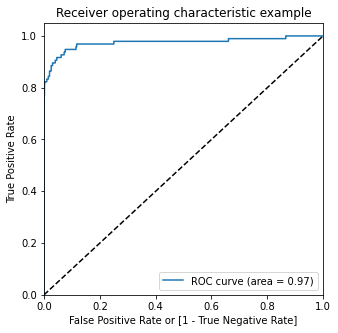

In [58]:
y_test_pred_prob = model_1.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

### Decision Tree

In [62]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [50, 100, 150, 200],
    'min_samples_split': [50, 100, 150, 200] ,
}
decision = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = decision, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 20.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.915016,0.013654,0.047156,0.005587,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923871,0.930130,0.004427,48
1,5.860886,0.012950,0.045013,0.001721,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923873,0.930130,0.004425,48
2,5.863599,0.021892,0.047366,0.005253,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933340,0.933183,0.923779,0.930101,0.004470,50
3,5.849200,0.014944,0.044246,0.001089,5,50,200,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933308,0.932862,0.923774,0.929981,0.004393,51
4,5.813720,0.036337,0.044106,0.001147,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,14
5,5.830745,0.030651,0.043583,0.001433,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,14
6,5.854369,0.077131,0.044357,0.000628,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,14
7,5.847702,0.057154,0.045358,0.003323,5,100,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,13
8,5.800214,0.038466,0.043793,0.001638,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.936620,0.930057,0.944631,0.937103,0.005960,23
9,5.844695,0.023968,0.043760,0.001446,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.936620,0.930057,0.944631,0.937103,0.005960,23


In [66]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9430318693238701
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [67]:
model_2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=150,
                                  min_samples_split=200)

model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [69]:
y_train_pred = model_2.predict(X_train)

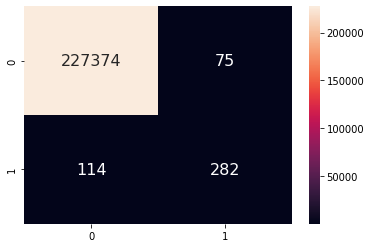

In [70]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [71]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



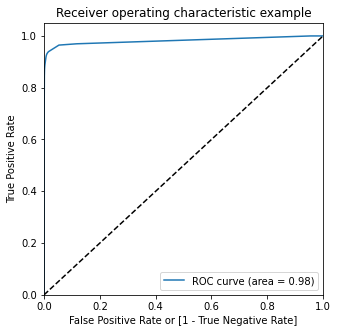

In [72]:
y_train_pred_prob = model_2.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_prob)

In [73]:
y_test_pred = model_2.predict(X_test)

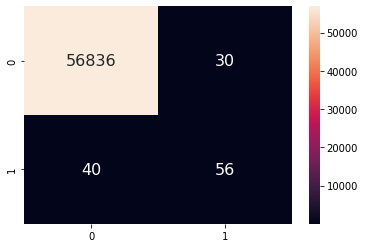

In [74]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [75]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



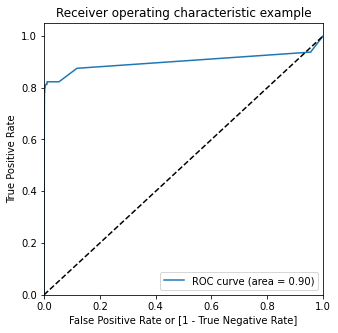

In [76]:
y_test_pred_prob = model_2.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

### XGBOOST

In [77]:
folds = 3
param_grid = {'learning_rate': [0.2, 0.4, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 20.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [78]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9759773556964396
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)
{'learning_rate': 0.2, 'subsample': 0.9}


In [79]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

model_3 = XGBClassifier(params = params)
model_3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [81]:
y_train_pred = model_2.predict(X_train)

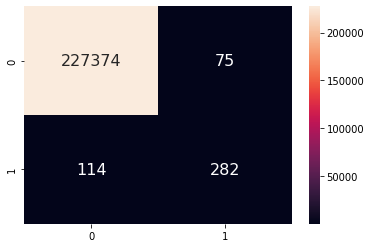

In [82]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [83]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



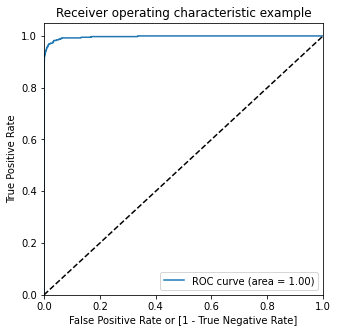

In [84]:
y_train_pred_prob = model_3.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_prob)

In [85]:
y_test_pred = model_3.predict(X_test)

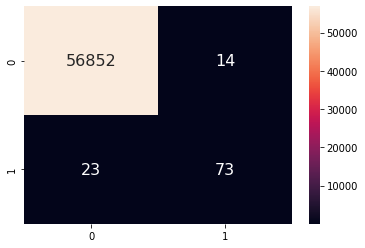

In [86]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [104]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9780204346757487
Sensitivity:- 0.8854166666666666
Specificity:- 0.9781767664333697


Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



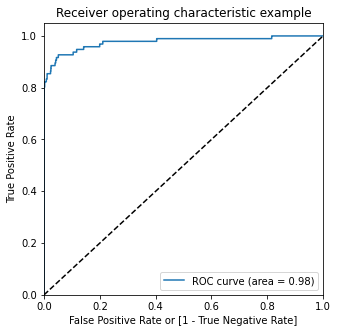

In [88]:
y_test_pred_prob = model_3.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

### BALANCING THE DATA using

1. Random Oversampling
2. SMOTE
3. ADASYN



In [90]:
ros = RandomOverSampler()
smote = SMOTE(random_state = 100)
adasyn = ADASYN(random_state = 100)

X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
X_train_smote, y_train_smote = ros.fit_sample(X_train, y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train)

### ROS DATA 

Logisitic Regression with ROS Data

In [91]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.477180,0.106800,0.031386,0.001659,0.01,{'C': 0.01},0.988560,0.981835,0.981371,0.984851,0.977377,0.982799,0.003735,1,0.984808,0.984298,0.984579,0.984776,0.986656,0.985023,0.000836
1,2.390687,0.136664,0.031208,0.001796,0.1,{'C': 0.1},0.988279,0.970747,0.965550,0.969289,0.972118,0.973197,0.007854,2,0.979435,0.978233,0.977973,0.980690,0.982043,0.979675,0.001528
2,2.902554,0.191739,0.034380,0.005791,1,{'C': 1},0.987207,0.968699,0.958852,0.960440,0.969405,0.968921,0.010079,3,0.977519,0.975275,0.975455,0.978509,0.979845,0.977320,0.001760
3,3.015992,0.303325,0.030861,0.001312,10,{'C': 10},0.987008,0.968425,0.958010,0.958853,0.968960,0.968251,0.010446,4,0.977267,0.974865,0.975103,0.978135,0.979526,0.976979,0.001783
4,3.048771,0.412525,0.030243,0.000507,100,{'C': 100},0.986982,0.968392,0.957931,0.958674,0.968913,0.968178,0.010483,5,0.977239,0.974821,0.975072,0.978091,0.979491,0.976943,0.001783
5,3.111686,0.568509,0.029902,0.000365,1000,{'C': 1000},0.986976,0.968395,0.957919,0.958657,0.968912,0.968172,0.010487,6,0.977237,0.974817,0.975066,0.978084,0.979488,0.976938,0.001784


In [93]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.98279866441708 at C = 0.01


In [106]:
logistic = LogisticRegression(C=0.01)
model_4 = logistic.fit(X_train_ros, y_train_ros)
y_train_pred = model_4.predict(X_train_ros)
y_test_pred = model_4.predict(X_test)

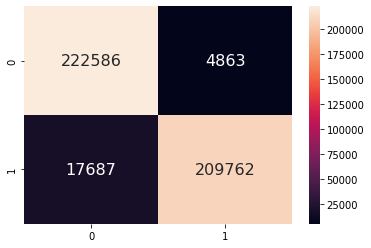

In [107]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [108]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_ros, y_train_pred))

Accuracy:- 0.950428447695967
Sensitivity:- 0.9222375125852389
Specificity:- 0.9786193828066951


Classification Report

               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



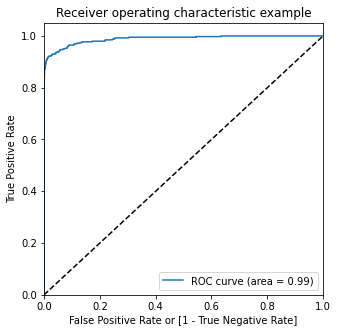

In [109]:
y_train_pred_prob = model_4.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_prob)

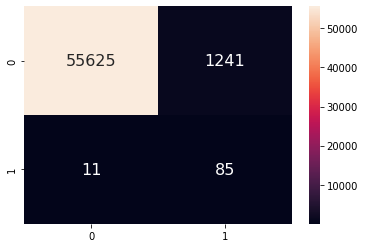

In [110]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [111]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9780204346757487
Sensitivity:- 0.8854166666666666
Specificity:- 0.9781767664333697


Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



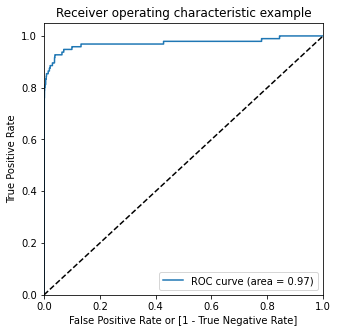

In [112]:
y_test_pred_prob = model_4.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

Decision Tree with ROS Data

In [113]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [50, 100, 150] ,
}
decision = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = decision, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.111608,0.070787,0.097166,0.005744,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990371,0.990912,0.990337,0.990540,0.000263,21
1,8.129581,0.025354,0.090615,0.000324,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990371,0.990912,0.990352,0.990545,0.000259,19
2,8.078761,0.036642,0.095652,0.003116,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990371,0.990915,0.990337,0.990541,0.000264,20
3,8.018530,0.061166,0.095906,0.002608,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990360,0.990827,0.990257,0.990481,0.000248,23
4,8.026313,0.027247,0.098530,0.005663,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990360,0.990837,0.990225,0.990474,0.000263,24
5,8.031271,0.054349,0.094487,0.003928,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990360,0.990837,0.990262,0.990486,0.000251,22
6,8.024248,0.088188,0.091587,0.001373,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990324,0.990764,0.990235,0.990441,0.000231,26
7,8.073936,0.086572,0.091561,0.001016,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990324,0.990764,0.990243,0.990444,0.000229,25
8,8.063409,0.065394,0.091065,0.000568,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990324,0.990764,0.990230,0.990439,0.000233,27
9,12.625683,0.080530,0.090139,0.001225,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999532,0.999643,0.999505,0.999560,0.000060,18


In [115]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.999776039437826
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [123]:
model_5 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

model_5.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [124]:
y_train_pred = model_5.predict(X_train_ros)

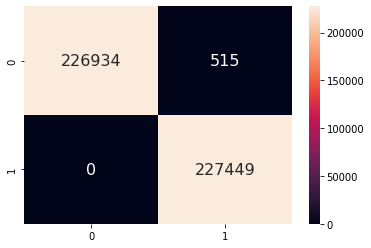

In [125]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [126]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_ros, y_train_pred))

Accuracy:- 0.998867878073766
Sensitivity:- 1.0
Specificity:- 0.997735756147532


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



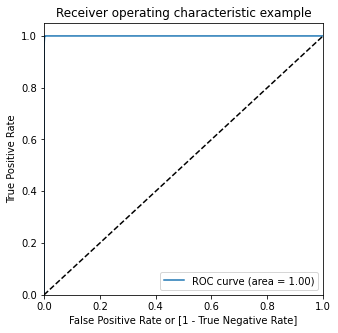

In [127]:
y_train_pred_prob = model_5.predict_proba(X_train_ros)[:,1]
draw_roc(y_train_ros, y_train_pred_prob)

In [128]:
y_test_pred = model_5.predict(X_test)

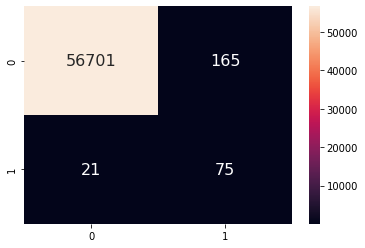

In [129]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [130]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9967346652154068
Sensitivity:- 0.78125
Specificity:- 0.9970984419512539


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.31      0.78      0.45        96

    accuracy                           1.00     56962
   macro avg       0.66      0.89      0.72     56962
weighted avg       1.00      1.00      1.00     56962



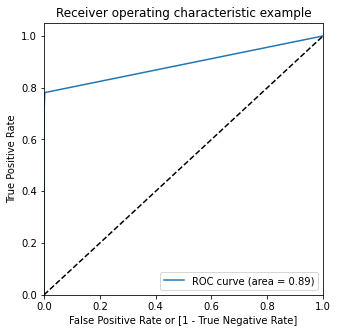

In [131]:
y_test_pred_prob = model_5.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

XGBOOST with ROS Data

In [132]:
folds = 3
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [133]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9999841920292522
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)
{'learning_rate': 0.6, 'subsample': 0.3}


In [143]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

model_6 = XGBClassifier(params = params)
model_6.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [144]:
y_train_pred = model_6.predict(X_train_ros)

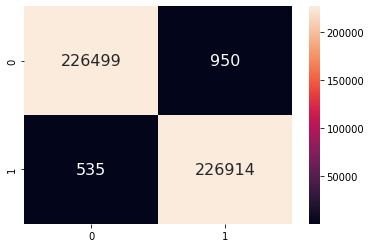

In [137]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [138]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_ros, y_train_pred))

Accuracy:- 0.9967355319214417
Sensitivity:- 0.9976478243474362
Specificity:- 0.9958232394954474


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



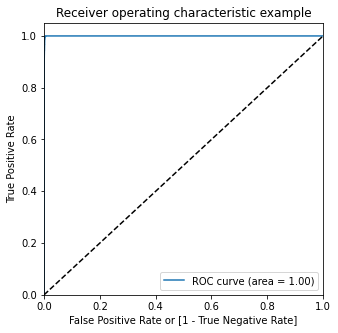

In [146]:
y_train_pred_prob = model_6.predict_proba(X_train_ros)[:,1]
draw_roc(y_train_ros, y_train_pred_prob)

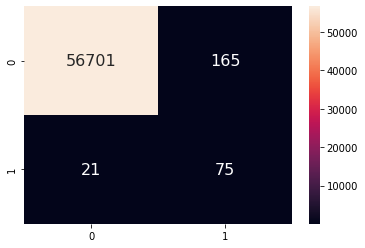

In [149]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

### SMOTE

Logisitic Regression with SMOTE Data

In [152]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [153]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.548414,0.065359,0.056984,0.001517,0.01,{'C': 0.01},0.988659,0.988615,0.988479,0.987843,0.988245,0.988368,0.000300,6,0.988229,0.988434,0.988453,0.988446,0.988348,0.988382,0.000085
1,3.531529,0.027252,0.057362,0.001620,0.1,{'C': 0.1},0.988700,0.988650,0.988515,0.987865,0.988267,0.988399,0.000306,5,0.988263,0.988478,0.988491,0.988467,0.988378,0.988415,0.000086
2,3.538736,0.043979,0.058488,0.004711,1,{'C': 1},0.988703,0.988654,0.988516,0.987869,0.988271,0.988403,0.000306,4,0.988265,0.988481,0.988496,0.988470,0.988379,0.988418,0.000087
3,3.561143,0.044818,0.056489,0.000410,10,{'C': 10},0.988704,0.988655,0.988516,0.987869,0.988270,0.988403,0.000306,3,0.988265,0.988481,0.988495,0.988470,0.988380,0.988418,0.000087
4,3.583785,0.058853,0.058109,0.001320,100,{'C': 100},0.988704,0.988655,0.988516,0.987869,0.988271,0.988403,0.000306,2,0.988265,0.988481,0.988495,0.988470,0.988380,0.988418,0.000087
5,3.554927,0.068220,0.058088,0.002288,1000,{'C': 1000},0.988704,0.988655,0.988516,0.987869,0.988271,0.988403,0.000306,1,0.988265,0.988481,0.988495,0.988470,0.988380,0.988418,0.000087


In [154]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884027460428915 at C = 1000


In [155]:
logistic = LogisticRegression(C=1000)
model_7 = logistic.fit(X_train_smote, y_train_smote)
y_train_pred = model_7.predict(X_train_smote)
y_test_pred = model_7.predict(X_test)

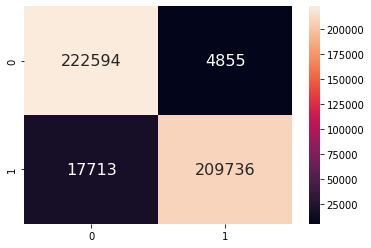

In [156]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [157]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_smote, y_train_pred))

Accuracy:- 0.9503888783859239
Sensitivity:- 0.9221232012451143
Specificity:- 0.9786545555267334


Classification Report

               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



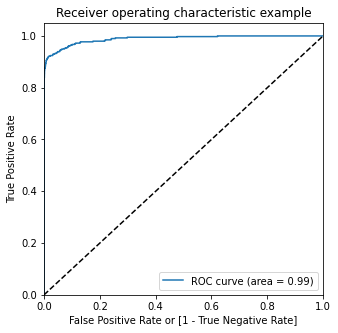

In [158]:
y_train_pred_prob = model_7.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_prob)

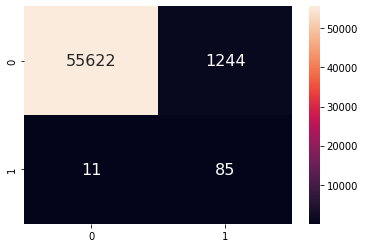

In [159]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [160]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9779677679856746
Sensitivity:- 0.8854166666666666
Specificity:- 0.9781240108324833


Classification Report

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



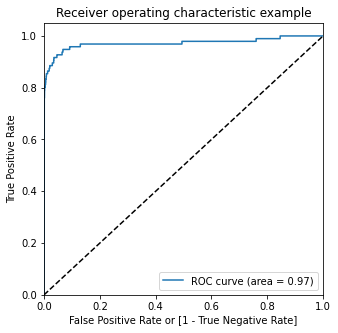

In [161]:
y_test_pred_prob = model_7.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

Decision Tree with ROS Data

In [162]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [50, 100, 150] ,
}
decision = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = decision, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min

In [163]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.055314,0.012292,0.092886,0.001976,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990268,0.983768,0.990455,0.988164,0.003109,20
1,8.000310,0.016728,0.094903,0.003049,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990268,0.983765,0.990480,0.988171,0.003117,19
2,7.971479,0.017009,0.098353,0.003801,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990268,0.983765,0.990455,0.988163,0.003111,21
3,7.983131,0.127807,0.090542,0.002751,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990242,0.983689,0.990344,0.988091,0.003113,22
4,8.113236,0.074855,0.094363,0.005619,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990242,0.983689,0.990328,0.988086,0.003110,24
5,8.096422,0.082098,0.093568,0.001492,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990242,0.983689,0.990333,0.988088,0.003111,23
6,7.964885,0.056920,0.092225,0.000834,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990167,0.983610,0.990319,0.988032,0.003127,25
7,7.949055,0.063820,0.091844,0.001028,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990160,0.983610,0.990319,0.988030,0.003126,26
8,7.943294,0.009636,0.089699,0.001166,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.990160,0.983610,0.990306,0.988026,0.003122,27
9,12.590239,0.118821,0.092635,0.005595,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999549,0.999566,0.999590,0.999568,0.000017,14


In [164]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9997781186088823
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [165]:
model_8 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

model_8.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [166]:
y_train_pred = model_8.predict(X_train_smote)

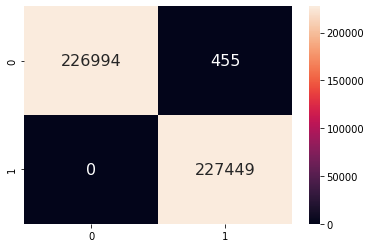

In [167]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [168]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_smote, y_train_pred))

Accuracy:- 0.9989997757739097
Sensitivity:- 1.0
Specificity:- 0.9979995515478195


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



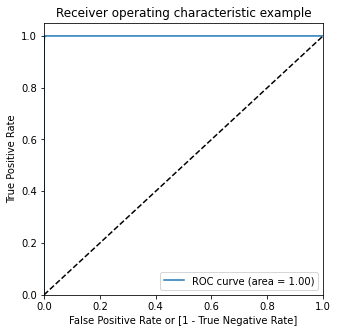

In [169]:
y_train_pred_prob = model_8.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_prob)

In [170]:
y_test_pred = model_8.predict(X_test)

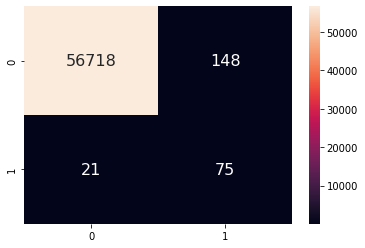

In [171]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [172]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9970331097924933
Sensitivity:- 0.78125
Specificity:- 0.9973973903562762


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.34      0.78      0.47        96

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962



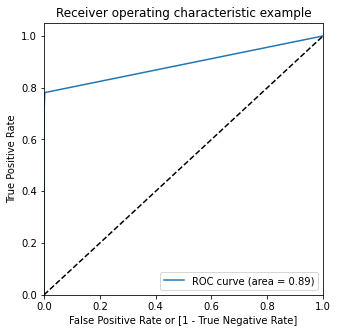

In [173]:
y_test_pred_prob = model_5.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

XGBOOST with ROS Data

In [174]:
folds = 3
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [175]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9999893542338404
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)
{'learning_rate': 0.6, 'subsample': 0.3}


In [176]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

model_9 = XGBClassifier(params = params)
model_9.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [177]:
y_train_pred = model_9.predict(X_train_smote)

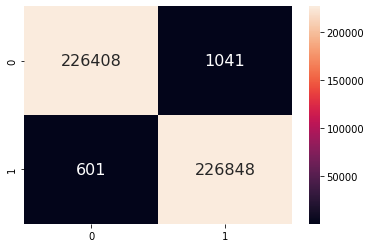

In [178]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [179]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_smote, y_train_pred))

Accuracy:- 0.9963903996060656
Sensitivity:- 0.9973576494071198
Specificity:- 0.9954231498050112


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



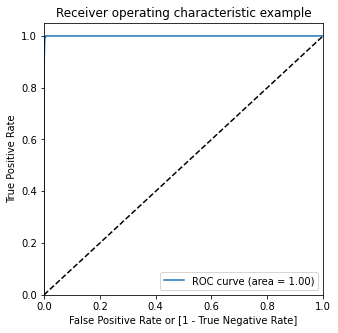

In [180]:
y_train_pred_prob = model_9.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_prob)

### ADASYN

Logisitic Regression with ADASYN Data

In [184]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
cv_num = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [185]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.257273,0.147071,0.058336,0.001677,0.01,{'C': 0.01},0.959091,0.959819,0.958140,0.959199,0.957862,0.958822,0.000720,6,0.958656,0.958708,0.959180,0.958738,0.958977,0.958852,0.000198
1,3.260143,0.175548,0.057837,0.002020,0.1,{'C': 0.1},0.959302,0.959966,0.958304,0.959359,0.958011,0.958989,0.000723,5,0.958827,0.958890,0.959346,0.958901,0.959135,0.959020,0.000194
2,3.179364,0.133073,0.057783,0.001471,1,{'C': 1},0.959323,0.959979,0.958318,0.959373,0.958025,0.959004,0.000724,4,0.958843,0.958906,0.959361,0.958916,0.959150,0.959035,0.000193
3,3.159078,0.148175,0.058883,0.005287,10,{'C': 10},0.959325,0.959980,0.958320,0.959374,0.958027,0.959005,0.000723,3,0.958845,0.958908,0.959362,0.958917,0.959152,0.959037,0.000193
4,3.202501,0.135959,0.059163,0.002456,100,{'C': 100},0.959326,0.959980,0.958320,0.959374,0.958027,0.959005,0.000723,2,0.958845,0.958908,0.959362,0.958917,0.959152,0.959037,0.000193
5,3.235779,0.186409,0.057718,0.002330,1000,{'C': 1000},0.959326,0.959980,0.958320,0.959374,0.958027,0.959005,0.000723,1,0.958845,0.958908,0.959362,0.958917,0.959152,0.959037,0.000193


In [186]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9590053423270417 at C = 1000


In [187]:
logistic = LogisticRegression(C=1000)
model_10 = logistic.fit(X_train_adasyn, y_train_adasyn)
y_train_pred = model_10.predict(X_train_adasyn)
y_test_pred = model_10.predict(X_test)

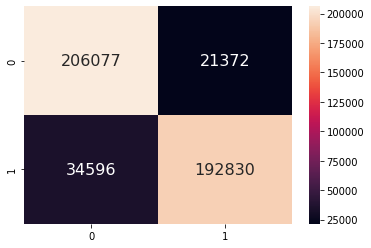

In [188]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [189]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_adasyn, y_train_pred))

Accuracy:- 0.876959604286892
Sensitivity:- 0.8478801896001337
Specificity:- 0.9060360784175793


Classification Report

               precision    recall  f1-score   support

           0       0.86      0.91      0.88    227449
           1       0.90      0.85      0.87    227426

    accuracy                           0.88    454875
   macro avg       0.88      0.88      0.88    454875
weighted avg       0.88      0.88      0.88    454875



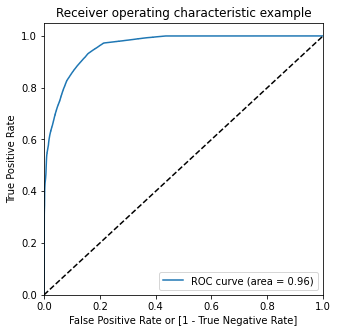

In [192]:
y_train_pred_prob = model_10.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_prob)

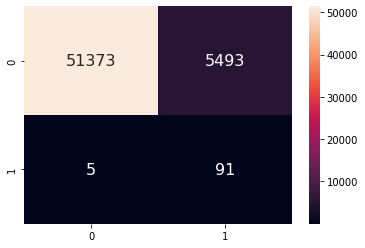

In [193]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [194]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9034795126575612
Sensitivity:- 0.9479166666666666
Specificity:- 0.9034044947771955


Classification Report

               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56866
           1       0.02      0.95      0.03        96

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



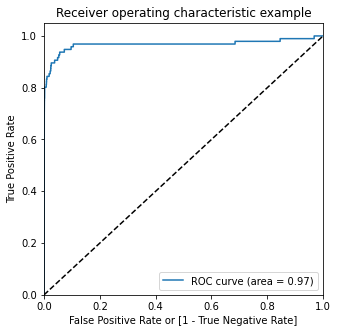

In [195]:
y_test_pred_prob = model_10.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

Decision Tree with ROS Data

In [196]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [50, 100, 150] ,
}
decision = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = decision, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 13.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min

In [197]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.264851,0.133368,0.092319,0.002329,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.883173,0.913736,0.912284,0.903064,0.014078,19
1,12.264609,0.142346,0.097804,0.012748,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.883158,0.913736,0.910946,0.902613,0.013804,22
2,12.212847,0.140022,0.091605,0.000807,5,50,150,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.883129,0.913736,0.910940,0.902601,0.013817,24
3,12.226701,0.162552,0.092527,0.004048,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.883557,0.913800,0.910621,0.902660,0.013570,21
4,12.240805,0.161273,0.092561,0.001186,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.883557,0.913800,0.910451,0.902603,0.013536,23
5,12.256940,0.095094,0.089698,0.000247,5,100,150,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.883557,0.913800,0.910343,0.902567,0.013516,26
6,12.278684,0.129056,0.093802,0.002325,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.883260,0.913703,0.910169,0.902378,0.013595,27
7,12.321174,0.164393,0.090854,0.003090,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.883306,0.913703,0.911444,0.902818,0.013828,20
8,12.206674,0.142623,0.092344,0.002414,5,150,150,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.883810,0.913703,0.910198,0.902570,0.013343,25
9,21.873148,0.132093,0.090893,0.000952,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.879907,0.930690,0.946284,0.918960,0.028339,15


In [198]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9279972701516671
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [200]:
model_11 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=150,
                                  min_samples_split=100)

model_11.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [201]:
y_train_pred = model_11.predict(X_train_adasyn)

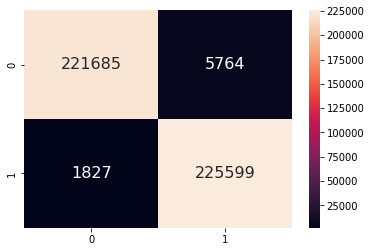

In [202]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [203]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_adasyn, y_train_pred))

Accuracy:- 0.9833118988733168
Sensitivity:- 0.9919666177130143
Specificity:- 0.9746580552123773


Classification Report

               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227449
           1       0.98      0.99      0.98    227426

    accuracy                           0.98    454875
   macro avg       0.98      0.98      0.98    454875
weighted avg       0.98      0.98      0.98    454875



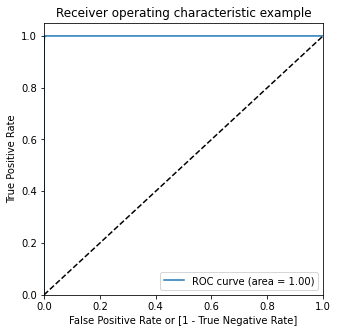

In [204]:
y_train_pred_prob = model_8.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_prob)

In [205]:
y_test_pred = model_11.predict(X_test)

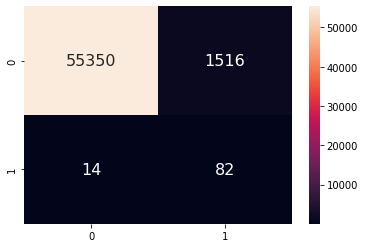

In [206]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [207]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_test, y_test_pred))

Accuracy:- 0.9731399880622169
Sensitivity:- 0.8541666666666666
Specificity:- 0.9733408363521261


Classification Report

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.85      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.98     56962



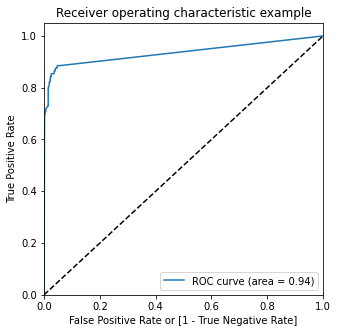

In [208]:
y_test_pred_prob = model_11.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_prob)

XGBOOST with ROS Data

In [209]:
folds = 3
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 29.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [210]:
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9877131935134144
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)
{'learning_rate': 0.6, 'subsample': 0.9}


In [211]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

model_12 = XGBClassifier(params = params)
model_12.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [212]:
y_train_pred = model_12.predict(X_train_smote)

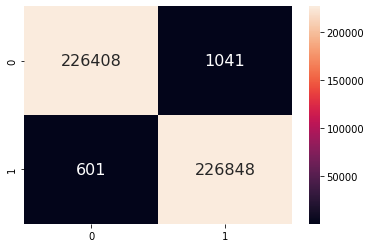

In [213]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
sns.heatmap(confusion, annot = True, annot_kws={"size": 16},fmt='g')
plt.show()

In [214]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

print("\n\nClassification Report")
print("\n",classification_report(y_train_smote, y_train_pred))

Accuracy:- 0.9963903996060656
Sensitivity:- 0.9973576494071198
Specificity:- 0.9954231498050112


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



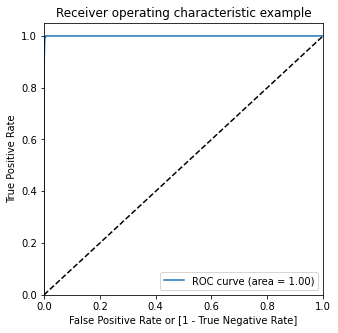

In [215]:
y_train_pred_prob = model_12.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_prob)

### Final Model 

Logistic Regression on ADASYN Balanced Dataset.

- Train Accuracy : 
1. Accuracy:- 0.876959604286892
2. Sensitivity:- 0.8478801896001337
3. Specificity:- 0.9060360784175793

- Test Accuracy:
1. Accuracy:- 0.9034795126575612
2. Sensitivity:- 0.9479166666666666
3. Specificity:- 0.9034044947771955

We builded 12 models in total and finally, were able to achieve decent model which persomed well on both test dataset with level of ROC Score, Accuracy, Sensitiviy and Specificiy.





